## The Sparks Foundation


### Prediction using Decision Tree Algorithm  (Task # 6)- Iris Dataset

#### Problem Statement: 
1.   Create the Decision Tree classifier and visualize it graphically. 
2.   Feed any new data to this classifier, it would be able to predict the right class accordingly. 


#### Author: Subha Mada

 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


### Step 1: Importing the dataset

In [2]:
# Importing the dataset
data = pd.read_csv("Iris.csv")

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step2: Inspecting the data frame

In [3]:
# To see type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# To check the number of rows and columns of the dataframe
data.shape

(150, 6)

In [5]:
# To look at the statistical aspects of the dataframe
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# To check the available uniques species in tha dataframe
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Step 3: Data Preparation

In [7]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

 No missing values .
 

### Step 4: Data Visualization

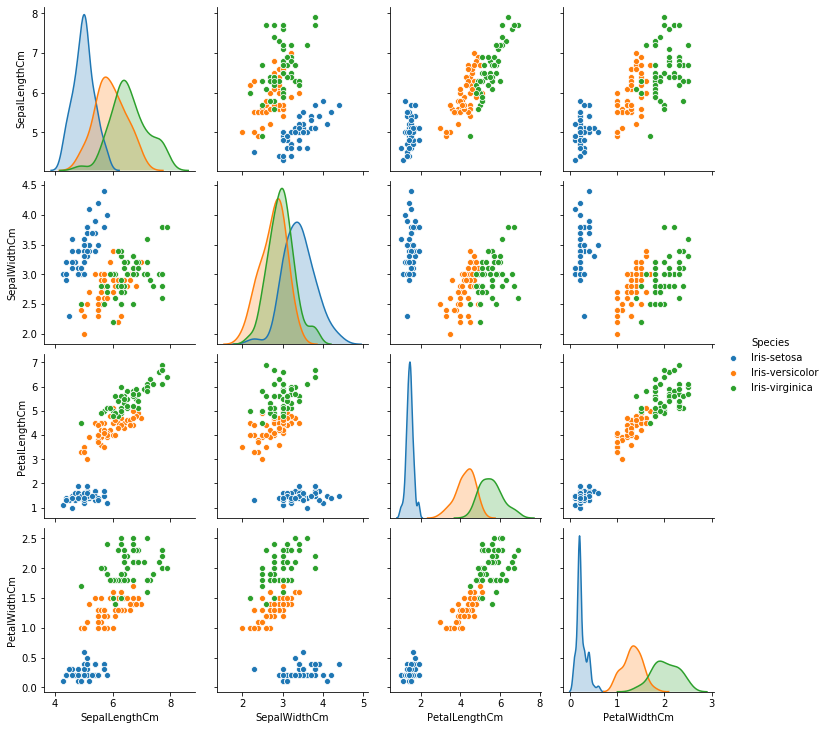

In [8]:
sns.pairplot(data.drop(['Id'],axis=1),hue='Species')
plt.show()

From this Scatter plot, we can say that Iris-Setosa (Blue) are clearly separated from the other two species Versicolor and Virginica.
For some combinations of the variables, orange and green colored dots are less overlapping indicating that those features are important for the classification.


### Step 5: Building  Decision Tree Classification Model

In [9]:
from sklearn import tree
#import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [10]:
# Putting feature variable to X
X = data.drop(['Species','Id'], axis=1)

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# Putting response variable to y
y = data['Species']

y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Step 6: Train _Test Split

In [12]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=100)

In [13]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

### Step7: Importing the Decision Tree Claasifier & Training the model

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score,multilabel_confusion_matrix


In [15]:
dt_base =tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier()

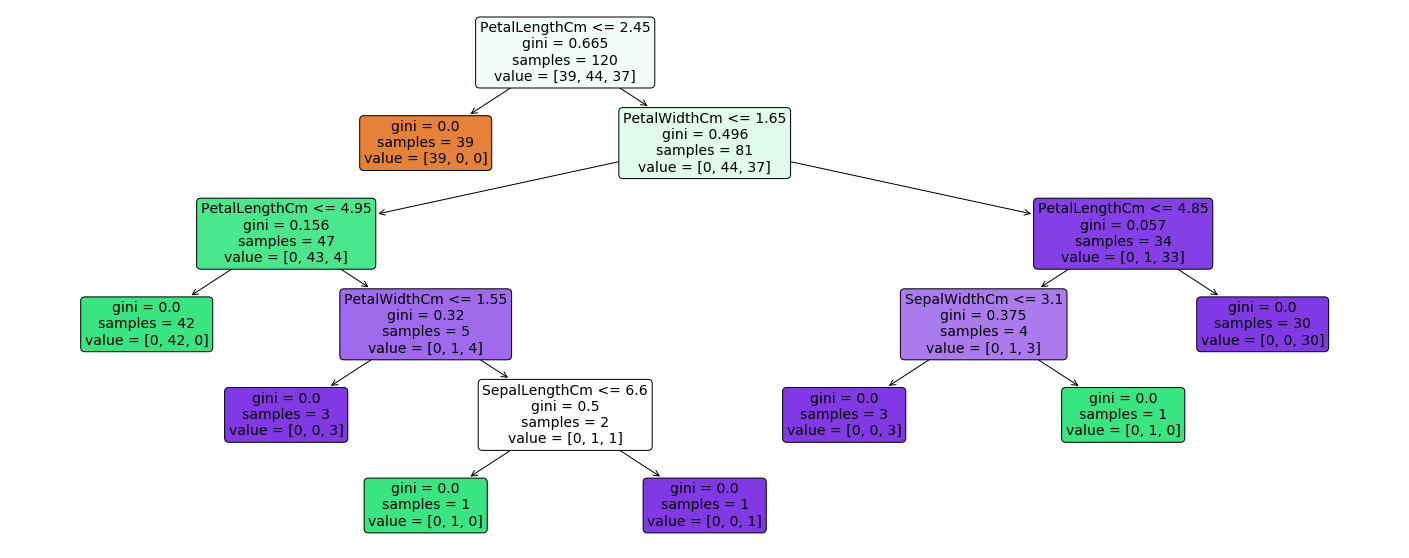

In [16]:

plt.figure(figsize=(25,10))
a = plot_tree(dt_base, 
              feature_names=list(X.columns), 
              filled=True, 
              rounded=True, 
              fontsize=14)

###  Step 8: Checking performance on  test data

In [17]:
y_test_pred=dt_base.predict(X_test)
y_test_pred

print(" Model Accuaracy of Unseen test data:", accuracy_score(y_test,y_test_pred)*100,'%')
multilabel_confusion_matrix(y_test,y_test_pred)

 Model Accuaracy of Unseen test data: 96.66666666666667 %


array([[[19,  0],
        [ 0, 11]],

       [[24,  0],
        [ 1,  5]],

       [[16,  1],
        [ 0, 13]]], dtype=int64)

### Step 9: Classification Report

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Step 10: Testing on unseen data

In [20]:

Test_point = [[5.5,3.6,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.8,3.0,1.1],
             [8.1,3.3,1.7,0.5],
             [6.0,3.4,5.1,1.6],
             [8.0,2.2,5.0,2.5]]

Test_result=dt_base.predict(Test_point)
Test_result

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)